In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
#Read the dataset
data = pd.read_csv("data/oasis_longitudinal.csv")

In [15]:
print(data.shape)

(373, 15)


In [17]:
print(data.head())

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  


In [19]:
print(data.isnull().sum())

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [23]:
data = data.groupby('Subject ID').first().reset_index()

In [25]:
features = ['Age', 'EDUC', 'SES', 'MMSE', 'nWBV', 'ASF']

In [31]:
print("DataFrame columns:", data.columns)

DataFrame columns: Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


In [33]:
available_columns = [col for col in columns_to_use if col in data.columns]
print("Available columns:", available_columns)

Available columns: ['Age', 'EDUC', 'SES', 'MMSE', 'nWBV', 'ASF', 'Group']


In [37]:
X = data[features]
y = data['Group']

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = model.predict(X_test)

In [47]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 0  2  2]
 [ 0  8  0]
 [ 1  4 13]]


In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

   Converted       0.00      0.00      0.00         4
    Demented       0.57      1.00      0.73         8
 Nondemented       0.87      0.72      0.79        18

    accuracy                           0.70        30
   macro avg       0.48      0.57      0.51        30
weighted avg       0.67      0.70      0.67        30



In [57]:
data['Group'] = data['Group'].map({'Nondemented': 0, 'Demented': 1})

print(data[features + ['Group']].dtypes)

Age        int64
EDUC       int64
SES      float64
MMSE     float64
nWBV     float64
ASF      float64
Group    float64
dtype: object


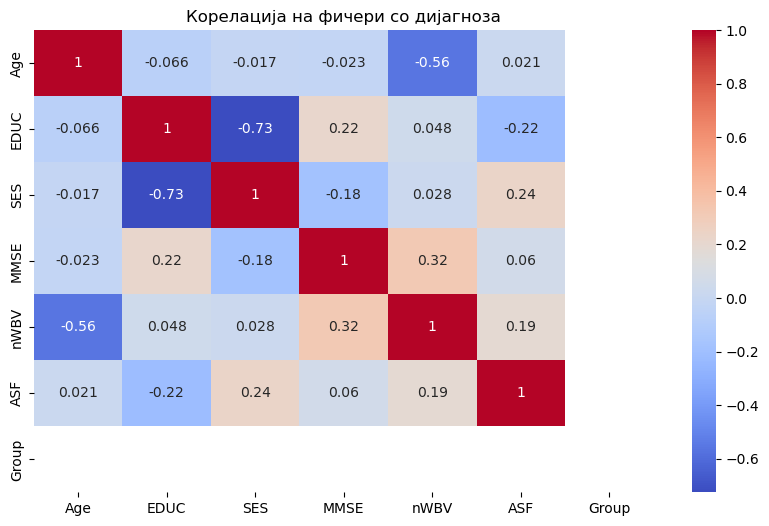

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[features + ['Group']].corr(), annot=True, cmap="coolwarm")
plt.title("Корелација на фичери со дијагноза")
plt.show()

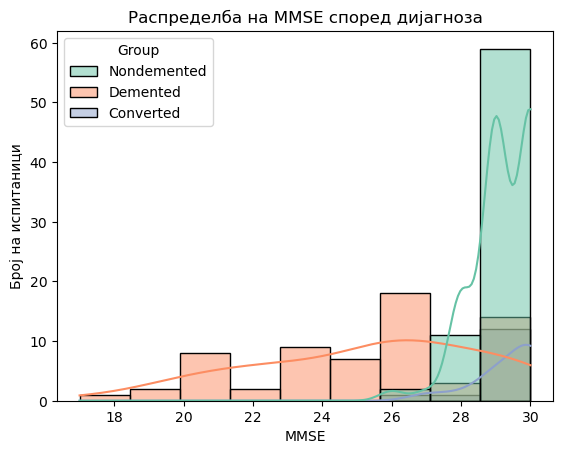

In [53]:
sns.histplot(data=data, x="MMSE", hue="Group", kde=True, palette="Set2")
plt.title("Распределба на MMSE според дијагноза")
plt.xlabel("MMSE")
plt.ylabel("Број на испитаници")
plt.show()

In [61]:
#Најважни features MMSE, nWBV, Age
#Random Forest моделот успешно детектира присуство на деменција
#MMSE вредноста има значајна корелација со дијагнозата

Во овој проект беше анализирано податочно множество со информации за пациенти со цел да се идентификуваат факторите поврзани со Алцхајмерова болест. Целта беше преку соодветна предобработка, визуелизација и примена на машинско учење да се изградат модели кои ќе можат да предвидат дали едно лице припаѓа на групата со деменција или без деменција.

Преку анализа и моделирање се потврди дека одредени биомаркерски и когнитивни карактеристики имаат значајна врска со дијагнозата на Алцхајмерова болест. Овој пристап може да се користи како дополнителна поддршка за рана детекција и мониторинг на ризик кај пациенти.